In [4]:
##loading libraries and dataset

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruit_data=pd.read_table("E:\\Learning Materials\\Datasets\\fruit_data_with_colors.txt")
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
##creating fruit names for labels

lookup_name=dict(zip(fruit_data.fruit_label.unique(),fruit_data.fruit_name.unique()))
lookup_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
##splitting data into training & test sets

X=fruit_data[['mass','width','height','color_score']]
y=fruit_data['fruit_label']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44, 4)
(15, 4)
(44,)
(15,)


In [8]:
##loading KNN model
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

In [9]:
##fitting the model

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
##measuring the accuracy

knn.score(X_test,y_test)

0.5333333333333333

In [11]:
##using trained model to classify a new fruit 

fruit_prediction=knn.predict([[175,8.5,7.5,0.5]])

lookup_name[fruit_prediction[0]]

'apple'

<IPython.core.display.Javascript object>


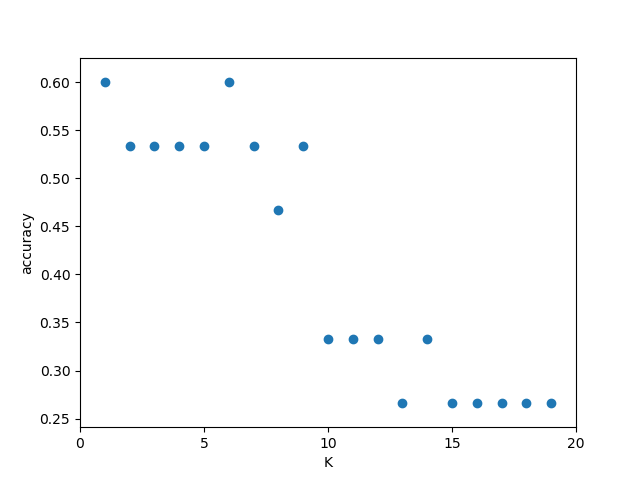

In [14]:
K_values=range(1,20)
scores=[]

for K in K_values:
    knn=KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
    
plt.figure()
plt.xlabel('K')
plt.ylabel('accuracy')
plt.scatter(K_values,scores)
plt.xticks([0,5,10,15,20]);

